In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

In [77]:
train = pd.read_csv('train_clean_v1.csv')
test = pd.read_csv('test_clean_v2.csv')

In [78]:
train['Comb Imputed'] = train['Comb Imputed'].astype('int')
test['Comb Imputed'] = test['Comb Imputed'].astype('int')

train['City Imputed'] = train['City Imputed'].astype('int')
test['City Imputed'] = test['City Imputed'].astype('int')

train['Hwy Imputed'] = train['Hwy Imputed'].astype('int')
test['Hwy Imputed'] = test['Hwy Imputed'].astype('int')


In [79]:
train.isna().sum()

Id                           0
Make                         0
Vehicle Class             5132
Engine Size(L)           24333
Cylinders                20605
Transmission             10440
Fuel Type                 7419
Fuel Consumption City     2450
Fuel Consumption Hwy      1980
Fuel Consumption Comb     2707
CO2 Emissions(g/km)          0
Comb Imputed                 0
City Imputed                 0
Hwy Imputed                  0
TransmisiHuruf           17954
TransmisiAngka           17954
TransmisiHurufPisah      17954
dtype: int64

In [80]:
train.dtypes

Id                         int64
Make                      object
Vehicle Class             object
Engine Size(L)           float64
Cylinders                float64
Transmission              object
Fuel Type                 object
Fuel Consumption City    float64
Fuel Consumption Hwy     float64
Fuel Consumption Comb    float64
CO2 Emissions(g/km)      float64
Comb Imputed               int32
City Imputed               int32
Hwy Imputed                int32
TransmisiHuruf            object
TransmisiAngka           float64
TransmisiHurufPisah       object
dtype: object

In [81]:
# make flag nan values in Vehicle Class column
train['Fuel TypeNaN'] = train['Fuel Type'].isnull().astype('int')
test['Fuel TypeNaN'] = test['Fuel Type'].isnull().astype('int')

In [82]:
# make flag nan values in Vehicle Class column
train['TransmisiHurufNaN'] = train['TransmisiHuruf'].isnull().astype('int')
test['TransmisiHurufNaN'] = test['TransmisiHuruf'].isnull().astype('int')

In [83]:
# make flag nan values in Vehicle Class column
train['VehicleClassNaN'] = train['Vehicle Class'].isnull()
test['VehicleClassNaN'] = test['Vehicle Class'].isnull()

In [84]:
# impute missing values
# impute Vehicle Class colum based on mode of Vehicle Class for each Make
train["Vehicle Class"] = train.groupby("Make")["Vehicle Class"].transform(lambda x: x.fillna(x.mode()[0]))
test["Vehicle Class"] = test.groupby("Make")["Vehicle Class"].transform(lambda x: x.fillna(x.mode()[0]))

In [85]:
# show how many car for each Vehicle Class on each TransmisiAngka
temp = train.groupby(['Vehicle Class', 'TransmisiAngka']).size().reset_index(name='counts')
temp = temp.pivot(index='Vehicle Class', columns='TransmisiAngka', values='counts')
temp = temp.fillna(0)
temp = temp.astype(int)

# Divide each value count by the total count of each vehicle class
temp = temp.apply(lambda x: x / temp.sum(axis=1))

temp *100

TransmisiAngka,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Vehicle Class,,,,,,,
COMPACT,1.549148,9.199940,55.834291,6.351507,24.251662,1.724052,1.089401
FULL-SIZE,0.000000,8.755813,43.881139,4.944993,41.181808,0.000000,1.236248
MID-SIZE,0.891306,2.982230,59.341891,7.651774,25.343349,0.919334,2.870116
MINICOMPACT,0.000000,34.529412,65.058824,0.000000,0.000000,0.411765,0.000000
MINIVAN,0.000000,7.365627,67.684141,0.000000,16.124751,3.649635,5.175846
PICKUP TRUCK - SMALL,3.975535,24.770642,61.501869,0.000000,9.751954,0.000000,0.000000
PICKUP TRUCK - STANDARD,0.198768,1.778970,58.974359,2.365335,7.582985,1.590141,27.509441
SPECIAL PURPOSE VEHICLE,0.000000,0.000000,72.892720,0.000000,27.107280,0.000000,0.000000
STATION WAGON - MID-SIZE,0.000000,0.000000,28.189911,42.284866,29.525223,0.000000,0.000000


In [86]:
car_counts = train['Vehicle Class'].value_counts()
print(car_counts)

Vehicle Class
SUV - SMALL                 28931
COMPACT                     22787
MID-SIZE                    22387
SUV - STANDARD              12335
PICKUP TRUCK - STANDARD     10891
FULL-SIZE                    9998
SUBCOMPACT                   9148
STATION WAGON - SMALL        5956
TWO-SEATER                   4091
PICKUP TRUCK - SMALL         3214
MINICOMPACT                  1834
MINIVAN                      1676
SPECIAL PURPOSE VEHICLE      1450
VAN - PASSENGER              1225
STATION WAGON - MID-SIZE      863
VAN - CARGO                   355
Name: count, dtype: int64


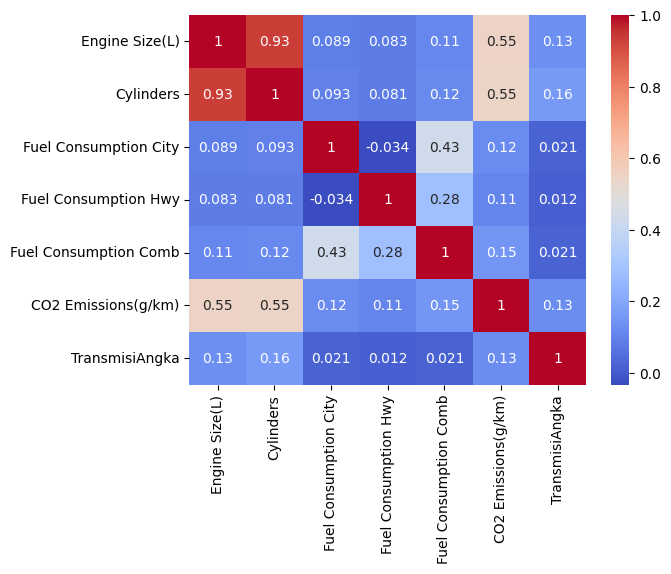

In [87]:
# select numeric datatype columns
col_numeric = train.select_dtypes(include=['int64', 'float64']).columns[1:]
correlation = train[col_numeric].corr()
sns.heatmap(train[col_numeric].corr(), annot=True, cmap='coolwarm')
plt.show()

In [88]:
train

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),Comb Imputed,City Imputed,Hwy Imputed,TransmisiHuruf,TransmisiAngka,TransmisiHurufPisah,Fuel TypeNaN,TransmisiHurufNaN,VehicleClassNaN
0,1,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.64,6.140000,7.514765,306.0,0,0,0,A,6.0,A,0,0,False
1,2,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,27.27,30.760000,28.840000,283.0,0,0,0,A,6.0,A,0,0,False
2,3,BMV,SUBCOMPACT,4.4,NaN,M6,Z,1.70,2.030000,0.000000,329.0,0,0,0,M,6.0,M,0,0,False
3,4,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.52,15.900000,11.210000,270.0,1,0,0,AS,6.0,A,0,0,False
4,5,BARUSU,MINICOMPACT,3.0,6.0,NaN,Z,20.15,6.000000,13.800000,193.0,0,0,0,NaN,NaN,NaN,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137136,137137,BMV,SUBCOMPACT,NaN,8.0,AS8,Z,33.71,12.990000,4.540000,275.0,0,0,0,AS,8.0,A,0,0,False
137137,137138,GONDA,STATION WAGON - SMALL,1.5,4.0,M6,X,15.41,0.870000,3.961098,166.0,0,0,0,M,6.0,M,0,0,False
137138,137139,NIRRAN,MID-SIZE,1.8,4.0,AV,X,2.99,8.380000,5.412531,181.0,0,0,0,NaN,NaN,NaN,0,1,False
137139,137140,TOYOTI,COMPACT,1.8,4.0,NaN,X,11.48,0.221407,6.400000,123.0,0,0,0,NaN,NaN,NaN,0,1,False


In [89]:
train[col_numeric].isna().sum()/len(train)*100

Engine Size(L)           17.743053
Cylinders                15.024683
Fuel Consumption City     1.786483
Fuel Consumption Hwy      1.443770
Fuel Consumption Comb     1.973881
CO2 Emissions(g/km)       0.000000
TransmisiAngka           13.091636
dtype: float64

In [90]:
# show cylinder nan xor engine size nan
temp = train[(train['Cylinders'].isna() ^ train['Engine Size(L)'].isna())]

In [91]:
train["Fuel Type"] = train["Fuel Type"].fillna(train["Fuel Type"].mode()[0])
test["Fuel Type"] = test["Fuel Type"].fillna(test["Fuel Type"].mode()[0])


In [92]:
train["TransmisiHurufPisah"] = train["TransmisiHurufPisah"].fillna(train["TransmisiHurufPisah"].mode()[0])
test["TransmisiHurufPisah"] = test["TransmisiHurufPisah"].fillna(test["TransmisiHurufPisah"].mode()[0])

train["TransmisiHuruf"] = train["TransmisiHuruf"].fillna(train["TransmisiHuruf"].mode()[0])
test["TransmisiHuruf"] = test["TransmisiHuruf"].fillna(test["TransmisiHuruf"].mode()[0])

train["TransmisiAngka"] = train["TransmisiAngka"].fillna(train["TransmisiAngka"].mode()[0])
test["TransmisiAngka"] = test["TransmisiAngka"].fillna(test["TransmisiAngka"].mode()[0])

train["Transmission"] = train["Transmission"].fillna(train["Transmission"].mode()[0])
test["Transmission"] = test["Transmission"].fillna(test["Transmission"].mode()[0])

In [93]:
# def polynomial_feature(df1, df2, columns, target, degree, save):
#     # Make a new dataframe for polynomial features
#     poly_features = df1[columns + [target]]
#     poly_features_test = df2[columns]

#     # imputer for handling missing values
#     imputer = SimpleImputer(strategy='median')

#     poly_target = poly_features[target]

#     poly_features = poly_features.drop(columns=[target])

#     # Need to impute missing values
#     poly_features = imputer.fit_transform(poly_features)
#     poly_features_test = imputer.transform(poly_features_test)

#     # Create the polynomial object with specified degree
#     poly_transformer = PolynomialFeatures(degree=degree)

#     # Train the polynomial features
#     poly_transformer.fit(poly_features)

#     # Transform the features
#     poly_features = poly_transformer.transform(poly_features)
#     poly_features_test = poly_transformer.transform(poly_features_test)

#     # Create a dataframe of the features
#     poly_features = pd.DataFrame(poly_features,
#                                  columns=poly_transformer.get_feature_names_out(columns))

#     poly_features_test = pd.DataFrame(poly_features_test,
#                                       columns=poly_transformer.get_feature_names_out(columns))

#     # Add in the target
#     poly_features[target] = poly_target

#     print("Poly features shape is", poly_features.shape)

#     # Find the correlations with the target
#     poly_corrs = poly_features.corr()[target].sort_values(ascending=False)
#     print("Top poly features")
#     print(poly_corrs.head(40))

# polynomial_feature(train, test, ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City',
#                                                'Fuel Consumption Hwy', 'Fuel Consumption Comb',
#                                                      'TransmisiAngka'], 'CO2 Emissions(g/km)', 4, True)

In [94]:
error_linear = []
coef_linear = []
intercept_linear = []
relative_error = []

In [95]:
train = train.dropna(subset=["Engine Size(L)"], axis=0)
train.isna().sum()

Id                           0
Make                         0
Vehicle Class                0
Engine Size(L)               0
Cylinders                17393
Transmission                 0
Fuel Type                    0
Fuel Consumption City     2014
Fuel Consumption Hwy      1642
Fuel Consumption Comb     2233
CO2 Emissions(g/km)          0
Comb Imputed                 0
City Imputed                 0
Hwy Imputed                  0
TransmisiHuruf               0
TransmisiAngka               0
TransmisiHurufPisah          0
Fuel TypeNaN                 0
TransmisiHurufNaN            0
VehicleClassNaN              0
dtype: int64

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
for i, unique_car in enumerate(train["Make"].unique()):
    temp = train[train["Make"] == unique_car]
    X_temp = temp["Engine Size(L)"].values.reshape(-1, 1)
    y_temp = temp["CO2 Emissions(g/km)"]
    model = LinearRegression()

    model.fit(X_temp, y_temp)
    coef = model.coef_
    intercept = model.intercept_
    coef_linear.append((float(coef[0]), i))
    intercept_linear.append(float(intercept))

    y_pred = model.predict(X_temp)
    error_linear.append(float(np.sqrt(mse(y_temp, y_pred))))
    relative_error.append(np.mean(np.abs(y_temp - y_pred) / y_temp))

In [97]:
for i, unique_car in enumerate(train["Make"].unique()):
    train.loc[train['Make'] == unique_car, 'extra'] = coef_linear[i][0]
    train.loc[train['Make'] == unique_car, 'extra2'] = intercept_linear[i]
    train.loc[train['Make'] == unique_car, 'extra3'] = relative_error[i]

train['extra'] = train['extra']
train['extra2'] = train['extra2']
train['extra3'] = train['extra3']

C:\Users\User\AppData\Local\Temp\ipykernel_6828\2958394956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[train['Make'] == unique_car, 'extra'] = coef_linear[i][0]
C:\Users\User\AppData\Local\Temp\ipykernel_6828\2958394956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[train['Make'] == unique_car, 'extra2'] = intercept_linear[i]
C:\Users\User\AppData\Local\Temp\ipykernel_6828\2958394956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [98]:
# List column that are object datatype
col_object = train.select_dtypes(include=['object']).columns

# One hot encode the col list that are object datatype
# keep the nan columns to be nan on the one hot encode columns
train = pd.get_dummies(train, columns=col_object, dummy_na=True)
test = pd.get_dummies(test, columns=col_object, dummy_na=True)

In [99]:
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

# drop all nan values
train = train.dropna()

In [100]:
# make random forest model for feature importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = train.drop(['CO2 Emissions(g/km)'], axis=1)
y = train['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

# get feature importance
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance = feature_importance.reset_index(drop=True)

In [101]:
feature_importance = feature_importance.head(20)

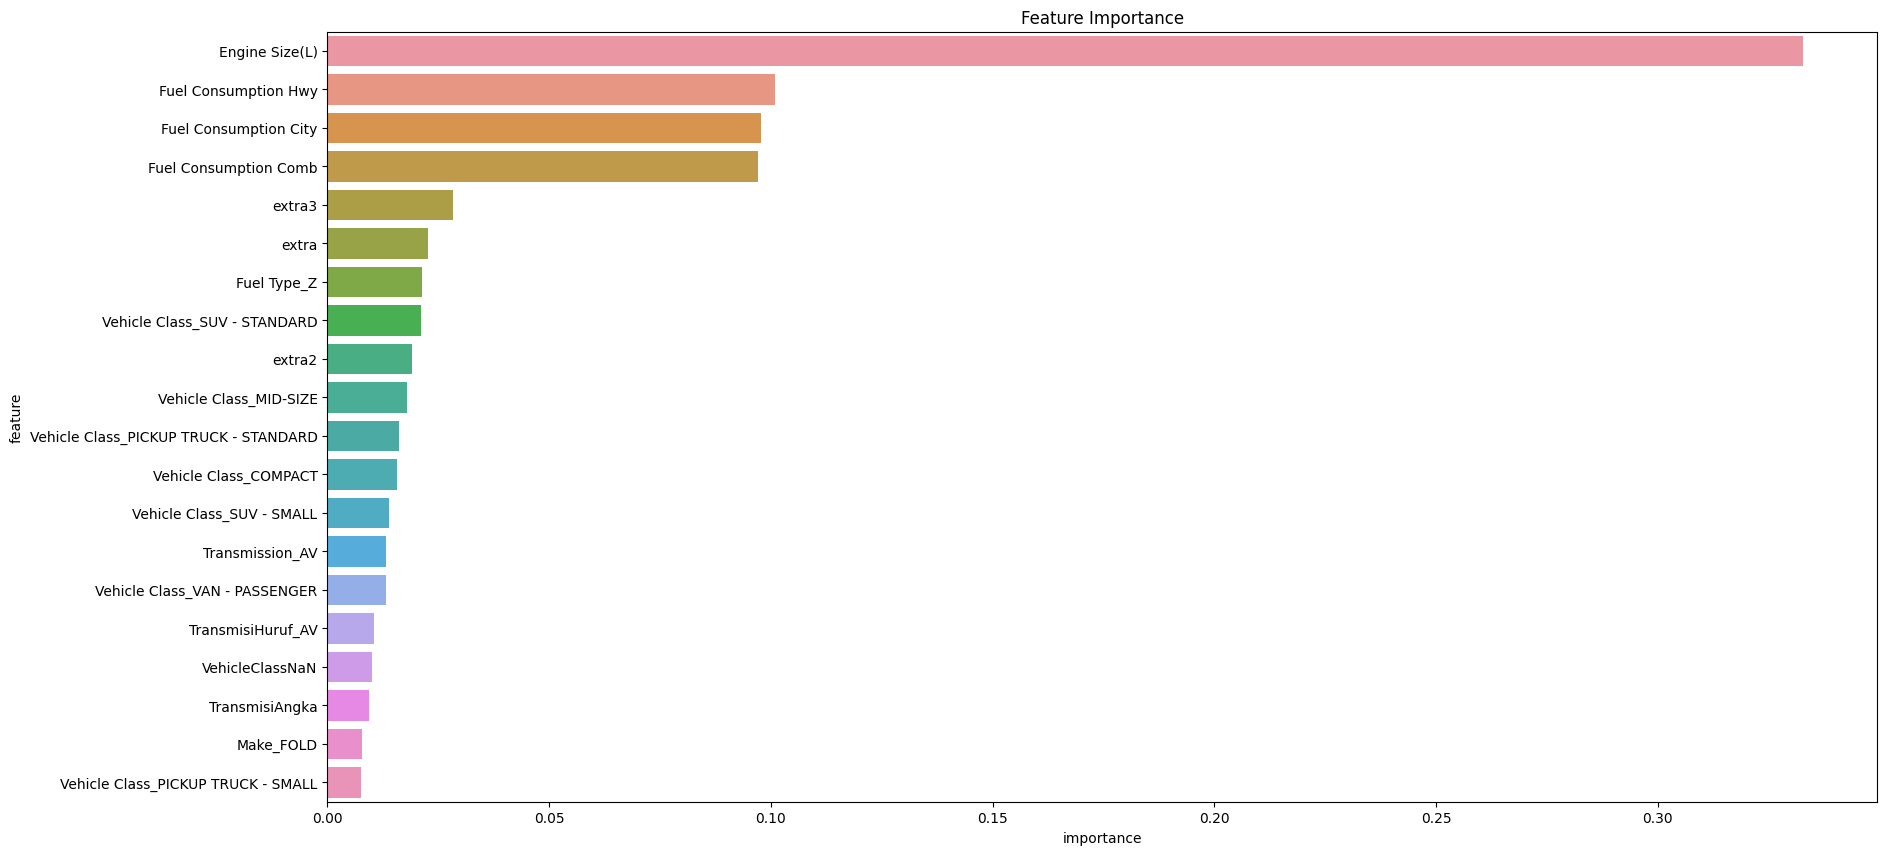

In [102]:
# plot feature importance
plt.figure(figsize=(20, 10))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [ ]:
train['Average Fuel'] = train.groupby('Vehicle Class')['Fuel Consumption Comb'].transform('mean')
test['Average Fuel'] = test.groupby('Vehicle Class')['Fuel Consumption Comb'].transform('mean')
